## I. MACD (Moving Average Convergence Divergence)

$MACD\ line = EMA_{26} - EMA_{12}$  
$Signal\ line = Moving\ Average\ of\ MACD_{9}$
    
Basic Strategy: 當 MACD 由上往下穿越 Signal Line，代表多頭，反之亦然。  
缺點:   
- 在 Side walk market (不是 trending) 時會給很多假信號。
- MACD 是 lagging indicator，也就是說，她的行動是比真實股價還慢的  
    
因此 MACD 通常會跟其他技術指標一起使用。

### 目標: 計算 Microsoft 的 10 年 MACD，並做成一個 function:

#### 處理數據:

In [3]:
import yfinance as yf
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
ticker = "MSFT"
start = dt.datetime.today() - dt.timedelta(3650)
end = dt.datetime.today()

In [7]:
ohlcv = yf.download(ticker, start, end)

[*********************100%***********************]  1 of 1 completed


In [11]:
ohlcv

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-26,28.510000,28.990000,28.500000,28.780001,22.882114,74628800
2011-01-27,28.750000,29.459999,28.490000,28.870001,22.953665,146938600
2011-01-28,28.900000,28.930000,27.450001,27.750000,22.063190,141249400
2011-01-31,27.770000,27.900000,27.420000,27.730000,22.047285,65029000
2011-02-01,27.799999,28.059999,27.610001,27.990000,22.254007,62810700
...,...,...,...,...,...,...
2021-01-15,213.520004,214.509995,212.029999,212.649994,212.649994,31746500
2021-01-19,213.750000,216.979996,212.630005,216.440002,216.440002,30480900
2021-01-20,217.699997,225.789993,217.289993,224.339996,224.339996,37777300


In [12]:
type(ohlcv)

pandas.core.frame.DataFrame

In [15]:
df = ohlcv.copy() # make a copy of the original data
type(df)

pandas.core.frame.DataFrame

In [16]:
df["MA_Fast"] = df["Adj Close"].ewm(span=12, min_periods=12).mean() # calculate 12 days' EMA, if total day is less than 12, the value will all be NaN
df["MA_Slow"] = df["Adj Close"].ewm(span=26, min_periods=26).mean() 

Date
2011-01-26           NaN
2011-01-27           NaN
2011-01-28           NaN
2011-01-31           NaN
2011-02-01           NaN
                 ...    
2021-01-15    216.997894
2021-01-19    216.956569
2021-01-20    217.503489
2021-01-21    218.056564
2021-01-22    218.641263
Name: MA_Slow, Length: 2515, dtype: float64

In [18]:
df["MACD"] = df["MA_Fast"] - df["MA_Slow"]
df["Signal"] = df["MACD"].ewm(span=9, min_periods=9).mean()

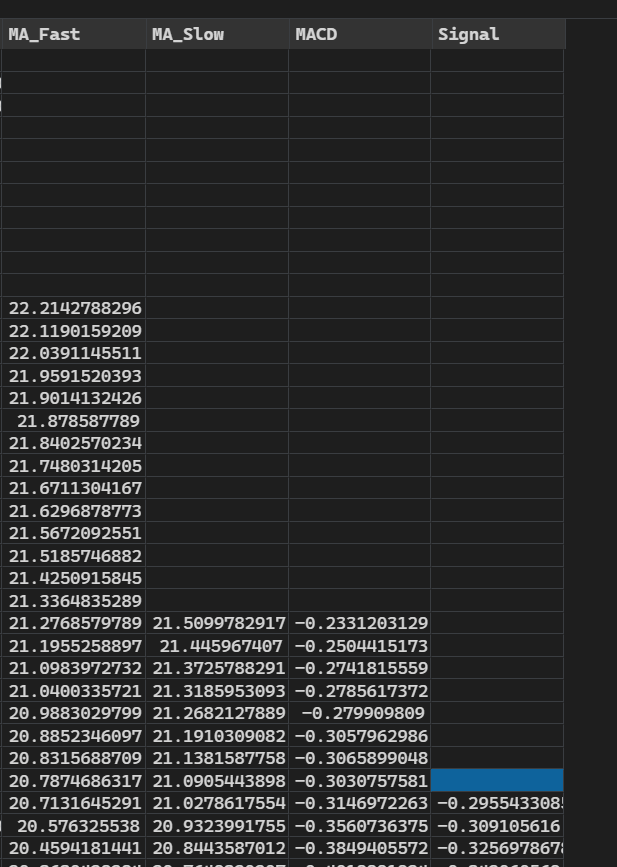

完成 MACD 的計算，注意到:  
- ```MA_Fast``` 會有 11 天的空白(12-1)    
- ```MA_Sloq``` 會有 25 天的空白(26-1)   
- ```MACD``` 會有 25 天的空白    
- ```Signal``` 會有 33 天的空白(25+(9-1))

在技術分析裡，最好不要留有 ```NaN``` 的資料，因此用 ```.dropna()``` 處理掉:

In [20]:
df.dropna()

,Open,High,Low,Close,Adj Close,Volume,MA_Fast,MA_Slow,MACD,Signal
Date,,,,,,,,,,
2011-03-15,25.080000,25.469999,25.000000,25.389999,20.306141,76067300,20.713165,21.027862,-0.314697,-0.295543
2011-03-16,25.219999,25.280001,24.680000,24.790001,19.826281,100725400,20.576326,20.932399,-0.356074,-0.309106
2011-03-17,25.059999,25.219999,24.750000,24.780001,19.818285,62497000,20.459418,20.844359,-0.384941,-0.325698
2011-03-18,25.059999,25.180000,24.799999,24.799999,19.834274,85486700,20.363043,20.764932,-0.401889,-0.342061
2011-03-21,25.180000,25.580000,25.150000,25.330000,20.258160,46878100,20.346879,20.725264,-0.378385,-0.349748
...,...,...,...,...,...,...,...,...,...,...
2021-01-15,213.520004,214.509995,212.029999,212.649994,212.649994,31746500,216.425892,216.997894,-0.572002,0.448969
2021-01-19,213.750000,216.979996,212.630005,216.440002,216.440002,30480900,216.428063,216.956569,-0.528506,0.253474
2021-01-20,217.699997,225.789993,217.289993,224.339996,224.339996,37777300,217.645283,217.503489,0.141794,0.231138


包成一個 function:

In [21]:
def MACD(DF, a, b, c):
    df = DF.copy()
    df["MA_Fast"] = df["Adj Close"].ewm(span=a, min_periods=a).mean()
    df["MA_Slow"] = df["Adj Close"].ewm(span=b, min_periods=b).mean()
    df["MACD"] = df["MA_Fast"] - df["MA_Slow"]
    df["Signal"] = df["MACD"].ewm(span=c, min_periods=c).mean()
    df.dropna()
    return df

#### 資料視覺化:

In [31]:
df.iloc[:,[4,8,9]] # 取第 4, 8, 9 column 的所有 row

,Adj Close,MACD,Signal
Date,,,
2011-01-26,22.882114,NaN,NaN
2011-01-27,22.953665,NaN,NaN
2011-01-28,22.063190,NaN,NaN
2011-01-31,22.047285,NaN,NaN
2011-02-01,22.254007,NaN,NaN
...,...,...,...
2021-01-15,212.649994,-0.572002,0.448969
2021-01-19,216.440002,-0.528506,0.253474
2021-01-20,224.339996,0.141794,0.231138


<AxesSubplot:xlabel='Date'>

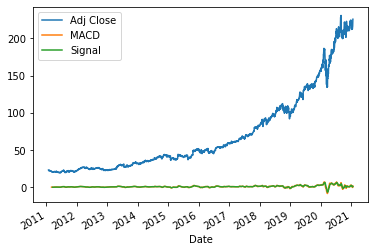

In [32]:
df.iloc[:,[4,8,9]].plot()

現在這個圖是沒有意義的，因為股票價格跟 MACD 的維度差太多。

In [34]:
ticker = "MSFT"
start = dt.datetime.today() - dt.timedelta(10)
end = dt.datetime.today()

In [35]:
ohlcv = yf.download(ticker, start, end)

[*********************100%***********************]  1 of 1 completed


In [37]:
df = MACD(ohlcv, 12, 26, 9)

In [39]:
print(df)

None


上面可以看到，當我只給 10 天的資料，就無法計算 MACD。因為在 MACD 的 function，我設定 min_periods 必須是 12。

## II. ATR and Bollinger bands:

這兩個指標都是在計算市場的 volatility(波動):

#### ATR:  
> 在計算ATR指標時，要先算出TR (True Range)這個數列，TR有一個明確的定義, 它指的是在以下三個數字中最大的那個數字：  
1. 今日最高價減最低價  
2. 今日最高價減昨日收盤價的絕對值  
3. 今日最低價減昨日收盤價的絕對值  
***
TR(在此指的是今天股價真正的波動範圍)之所以這樣設計的原因在於：  
1.如果今天股價跟昨天相比沒有劇烈漲跌，那麼今天的波動範圍就是今日最高價減去今日最低價  
2.如果今天大盤是跳空上漲，而且這個空沒有被回補，那麼如果還是以今高減今低當作今天價格的波動幅度，那顯然就遺漏了跳空上漲的部份，所以要將那部份加回來，所以今天TR就是今日最高價減去昨日收盤價    
3.如果今天大盤是跳空下漲，而且這個空沒有被回補，那麼如果還是以今高減今低當作今天價格的波動幅度，那顯然就遺漏了跳空下跌的部份，所以要將那部份加回來，所以今天TR就是今日最低價減去昨日收盤價的「絕對值」．注意，我們對真正的波幅都是取「正值」  
[from MoneyDj](https://www.moneydj.com/kmdj/wiki/wikiviewer.aspx?keyid=ea6bb7ee-6a9b-4ba9-ad8c-b6a1b5bc9ed4)

In [41]:
ticker = "MSFT"
start = dt.datetime.today() - dt.timedelta(3650)
end = dt.datetime.today()

In [42]:
ohlcv = yf.download(ticker, start, end)

[*********************100%***********************]  1 of 1 completed


In [57]:
def ATR(DF, n):
    df = DF.copy()
    df["H-L"] = abs(df["High"] - df["Low"]) 
    df["H-PC"] = abs(df["High"] - df["Adj Close"].shift(1)) # 今天跳空上漲的情況
    df["L-PC"] = abs(df["Low"] - df["Adj Close"].shift(1)) # 今天跳空下跌
    # 取三者裡的最大者，且不忽略 NaN
    df["TR"] = df[ ["H-L", "H-PC", "L-PC"] ].max(axis=1, skipna=False)
    df["ATR"] = df["TR"].rolling(n).mean() # rolling 的天數自訂，通常用 20
    # 刪除暫時的 columns
    df = df.drop( ["H-L", "H-PC", "L-PC"], axis=1)
    return df

In [58]:
atr = ATR(ohlcv, 20)

In [59]:
atr

,Open,High,Low,Close,Adj Close,Volume,TR,ATR
Date,,,,,,,,
2011-01-26,28.510000,28.990000,28.500000,28.780001,22.882114,74628800,NaN,NaN
2011-01-27,28.750000,29.459999,28.490000,28.870001,22.953665,146938600,6.577885,NaN
2011-01-28,28.900000,28.930000,27.450001,27.750000,22.063190,141249400,5.976336,NaN
2011-01-31,27.770000,27.900000,27.420000,27.730000,22.047285,65029000,5.836809,NaN
2011-02-01,27.799999,28.059999,27.610001,27.990000,22.254007,62810700,6.012714,NaN
...,...,...,...,...,...,...,...,...
2021-01-15,213.520004,214.509995,212.029999,212.649994,212.649994,31746500,2.479996,4.096500
2021-01-19,213.750000,216.979996,212.630005,216.440002,216.440002,30480900,4.349991,4.165499
2021-01-20,217.699997,225.789993,217.289993,224.339996,224.339996,37777300,9.349991,4.449499


<AxesSubplot:xlabel='Date'>

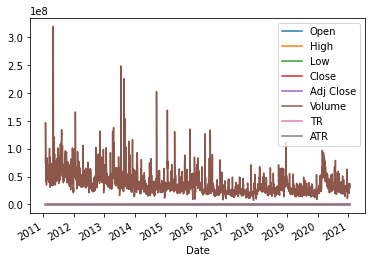

In [60]:
atr.plot()

<AxesSubplot:xlabel='Date'>

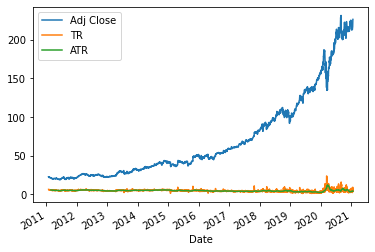

In [61]:
atr.iloc[:,[4,6,7]].plot()

發現時間斷太長，不好判斷:

<AxesSubplot:xlabel='Date'>

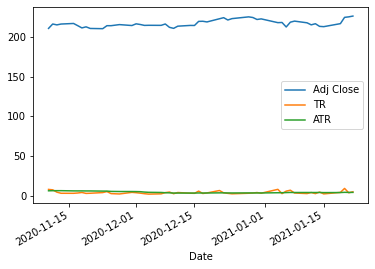

In [62]:
atr.iloc[-50:,[4,6,7]].plot() #  取最新的 50 天

#### Bollinger bands

就是正負兩個標準差:

In [66]:
def BollBand(DF, n): # n 一樣是放自訂的 rolling 天數
    df = DF.copy()
    df["MA"] = df["Adj Close"].rolling(n).mean()
    df["BB_up"] = df["MA"] + 2*df["MA"].rolling(n).std()
    df["BB_dn"] = df["MA"] - 2*df["MA"].rolling(n).std()
    df["BB_width"] = df["BB_up"] - df["BB_dn"] # 計算布林帶寬度
    df.dropna(inplace=True)
    return df

In [67]:
ohlcv = yf.download(ticker, start, end)

[*********************100%***********************]  1 of 1 completed


In [68]:
bb = BollBand(ohlcv, 20)

<AxesSubplot:xlabel='Date'>

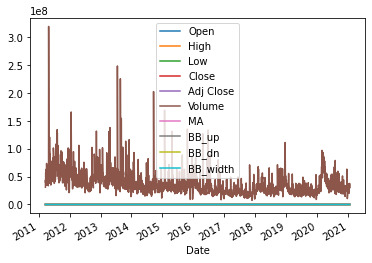

In [74]:
bb.plot()

<AxesSubplot:xlabel='Date'>

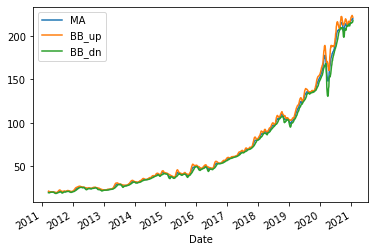

In [76]:
bb.iloc[:,[6,7,8]].plot()

一樣天數太多不好觀察，改為 50 天:

<AxesSubplot:xlabel='Date'>

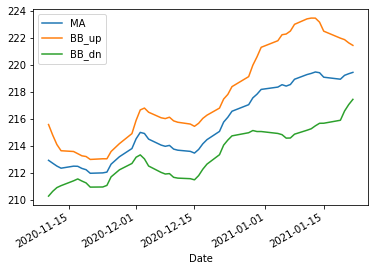

In [78]:
bb.iloc[-50:,[6,7,8]].plot()

其實也可以由後前數:

<AxesSubplot:xlabel='Date'>

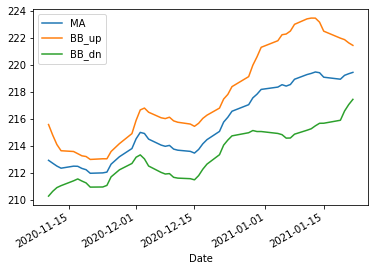

In [80]:
bb.iloc[-50:,[-4,-3,-2]].plot()